In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [78]:
X_train_df, y_train_df = pd.read_csv("./csv_data/UTF-878X_train.csv"),  pd.read_csv("./csv_data/UTF-878y_train.csv")
X_test_df, y_test_df = pd.read_csv("./csv_data/UTF-878X_test.csv"),  pd.read_csv("./csv_data/UTF-878y_test.csv")
X_train_tensor, y_train_tensor = torch.tensor(X_train_df.values), torch.tensor(y_train_df.values)
X_test_tensor, y_test_tensor = torch.tensor(X_test_df.values), torch.tensor(y_test_df.values)

In [80]:
from GradientBoosting import GradientBoostClassifier
model = GradientBoostClassifier(50, 0.1, 8)
model.fit(X_train_tensor, y_train_tensor)

In [ ]:
y_pred = model.predict(X_test_tensor)
# Compute accuracy, precision, and recall
accuracy = accuracy_score(y_test_tensor, y_pred)

Accuracy = 0.7479935794542536
Class 0: Precision = 0.8585, Recall = 0.3906, F1-score = 0.5369
Class 1: Precision = 0.7253, Recall = 0.9615, F1-score = 0.8269


In [88]:
#Add a confusion matrixs
cm = confusion_matrix(y_test_tensor, y_pred)
print(cm)
precision = cm[1][1] / (cm[1][1] + cm[0][1])
recall = cm[1][1] / (cm[1][1] + cm[1][0])
f1_score = 2 * ((precision*recall)/(precision+recall))
print(f"Accuracy = {accuracy_score(y_test_tensor, y_pred)}, Precision = {precision}, Recall = {recall}, f1-score = {f1_score}",)

[[ 91 142]
 [ 15 375]]
Accuracy = 0.7479935794542536, Precision = 0.7253384912959381, Recall = 0.9615384615384616, f1-score = 0.8269018743109151


In [ ]:
accuracy = accuracy_score(y_test_tensor, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_tensor, y_pred, average=None)

print(f"Accuracy = {accuracy}")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_score)):
    print(f"Class {i}: Precision = {p:.4f}, Recall = {r:.4f}, F1-score = {f1:.4f}")

Accuracy = 0.7479935794542536
Class 0: Precision = 0.8585, Recall = 0.3906, F1-score = 0.5369
Class 1: Precision = 0.7253, Recall = 0.9615, F1-score = 0.8269


In [121]:
from tabulate import tabulate
print(accuracy)
print(precision)
table = [["Accuracy", f"{accuracy:.2f}"],["Precision", f"Class 0: {precision[0]:.2f} Class 1: {precision[1]:.2f}"],["Recall", f"Class 0: {recall[0]:.2f} Class 1: {recall[1]:.2f}"],["f1-score", f"Class 0: {f1_score[0]:.2f} Class 1: {f1_score[1]:.2f}"]]
print(tabulate(table, headers=["Classification Metric", "Gradient Boost Algorithm Results"], tablefmt="fancy_grid",  floatfmt="g", stralign="center"))


0.7479935794542536
[0.85849057 0.72533849]
╒═════════════════════════╤════════════════════════════════════╕
│  Classification Metric  │  Gradient Boost Algorithm Results  │
╞═════════════════════════╪════════════════════════════════════╡
│        Accuracy         │                0.75                │
├─────────────────────────┼────────────────────────────────────┤
│        Precision        │    Class 0: 0.86 Class 1: 0.73     │
├─────────────────────────┼────────────────────────────────────┤
│         Recall          │    Class 0: 0.39 Class 1: 0.96     │
├─────────────────────────┼────────────────────────────────────┤
│        f1-score         │    Class 0: 0.54 Class 1: 0.83     │
╘═════════════════════════╧════════════════════════════════════╛


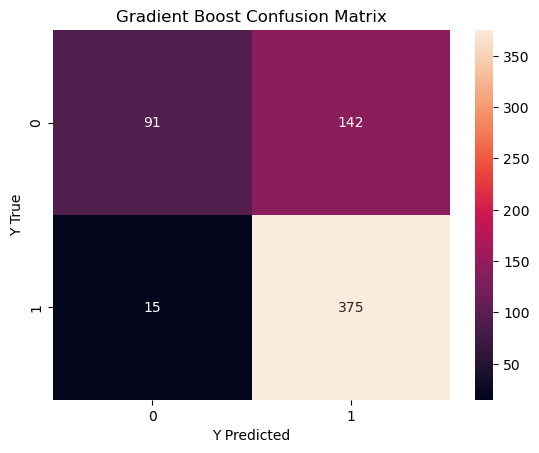

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Gradient Boost Confusion Matrix")
plt.xlabel("Y Predicted")
plt.ylabel("Y True")
plt.show()

NameError: name 'f' is not defined